In [1]:
from pyCHX.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from pyCHX.chx_xpcs_xsvs_jupyter_V1 import *
import itertools

In [2]:
%matplotlib notebook
#%matplotlib inline

## Load Metadata & Image Data



### Change this line to give a uid

In [79]:
uid = '3ef9240a' # a count data collected by Eiger4M and OAV



In [38]:
uid = uid[:8]
print('The current uid for analysis is: %s...'%uid)

The current uid for analysis is: 3ef9240a...


In [39]:
#get_last_uids( -3)

In [40]:
sud = get_sid_filenames(db[uid])
for pa in sud[2]:
    if 'master.h5' in pa:
        data_fullpath = pa
print ('scan_id, full-uid, data path are:  %s--%s--%s'%(sud[0], sud[1], data_fullpath ))

#start_time, stop_time = '2017-2-24  12:23:00', '2017-2-24  13:42:00' 
#sids, uids, fuids  = find_uids(start_time, stop_time)

filepath : /nsls2/xf11id1/data/2019/08/30/af630b86-c465-4cf1-a76f
got images_per_file
scan_id, full-uid, data path are:  20599--3ef9240a-b9aa-42cf-af7a-b1d789262b9b--/nsls2/xf11id1/data/2019/08/30/af630b86-c465-4cf1-a76f_4132_master.h5


In [41]:

uidstr = 'uid=%s'%uid

# Don't Change the lines below here

* get metadata

In [42]:
md = get_meta_data( uid )
md_blue = md.copy()
#md_blue

More than one device. This would have unintented consequences.Currently, only the device contains 'default_dec=eiger'.


In [43]:
#md_blue['detectors'][0]
#if md_blue['OAV_mode'] != 'none':
#    cx , cy = md_blue[md_blue['detectors'][0]+'_beam_center_x'], md_blue[md_blue['detectors'][0]+'_beam_center_x']
#else: 
#    cx , cy = md_blue['beam_center_x'], md_blue['beam_center_y']
#print(cx,cy)

In [50]:
detectors = sorted(get_detectors(db[uid]))
print('The detectors are:%s'%detectors)
if len(detectors) >1:
    md['detector'] = detectors[1]
    print( md['detector'])


The detectors are:['OAV_image', 'eiger4m_single_image']
eiger4m_single_image


In [45]:
if md['detector'] =='eiger4m_single_image' or md['detector'] == 'image':    
    reverse= True
    rot90= False
elif md['detector'] =='eiger500K_single_image':    
    reverse= True
    rot90=True
elif md['detector'] =='eiger1m_single_image':    
    reverse= True
    rot90=False
print('Image reverse: %s\nImage rotate 90: %s'%(reverse, rot90))    

Image reverse: True
Image rotate 90: False


In [46]:
md['detector']

'eiger4m_single_image'

In [47]:
#%run /home/yuzhang/pyCHX_link/pyCHX/chx_generic_functions.py

### Get Eiger data

In [87]:
imgs = load_data( uid, md['detector'], reverse= reverse, rot90=rot90  )
md.update( imgs.md );Nimg = len(imgs);
#md['beam_center_x'], md['beam_center_y']  = cx, cy
#if 'number of images'  not in list(md.keys()):
md['number of images']  = Nimg
pixel_mask =  1- np.int_( np.array( imgs.md['pixel_mask'], dtype= bool)  )
print( 'The data are: %s' %imgs )

#md['acquire period' ] = md['cam_acquire_period']
#md['exposure time'] =  md['cam_acquire_time']
mdn = md.copy()

img = imgs[100]

The data are: Pipeline processed through proc_func. Original repr:
    EigerImages processed through proc_func. Original repr:
        <Frames>
        Length: 400 frames
        Frame Shape: 2167 x 2070
        Pixel Datatype: uint32


#### Get OAV image

In [80]:
h = db[uid]

In [84]:
h.fields()

{'OAV_image',
 'OAV_stats1_total',
 'OAV_stats2_total',
 'OAV_stats3_total',
 'OAV_stats4_total',
 'OAV_stats5_total',
 'eiger4m_single_image',
 'eiger4m_single_stats1_total',
 'eiger4m_single_stats2_total',
 'eiger4m_single_stats3_total',
 'eiger4m_single_stats4_total',
 'eiger4m_single_stats5_total'}

In [82]:
try:
    #oavs = list( h.data( 'OAV_image' ) )[0]
    #Or try to use oavs = db.get_images(db[uid],  'OAV_image'  )
    print( len(oavs),oavs[0].shape )
except:
    print('oavs are not available. Please contact DAMA group for help.')


oavs are not available. Please contact DAMA group for help.


/opt/conda_envs/analysis-2019-3.0-chx/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Images and get_images are deprecated. Use Header.data('OAV_image') instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
#db.get_images(db[uid],  'OAV_image'  )

# For Dscan data

In [70]:
uid = '4ecaff7e' 
h = db[uid]

In [71]:
h.fields()

{'diff_xh',
 'diff_xh_user_setpoint',
 'eiger4m_single_image',
 'eiger4m_single_stats1_total',
 'eiger4m_single_stats2_total',
 'eiger4m_single_stats3_total',
 'eiger4m_single_stats4_total',
 'eiger4m_single_stats5_total'}

In [95]:
imgs =  db.get_images(db[uid], 'eiger4m_single_image')
img = imgs[0][0]

/opt/conda_envs/analysis-2019-3.0-chx/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Images and get_images are deprecated. Use Header.data('eiger4m_single_image') instead.
  """Entry point for launching an IPython kernel.


In [96]:
imgs

<Frames>
Length: 1 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32

In [97]:
img.shape

(2167, 2070)

In [98]:
#img[0]

### Plot images

In [99]:
#img = imgs[100]
#img = oavs[39]



<IPython.core.display.Javascript object>


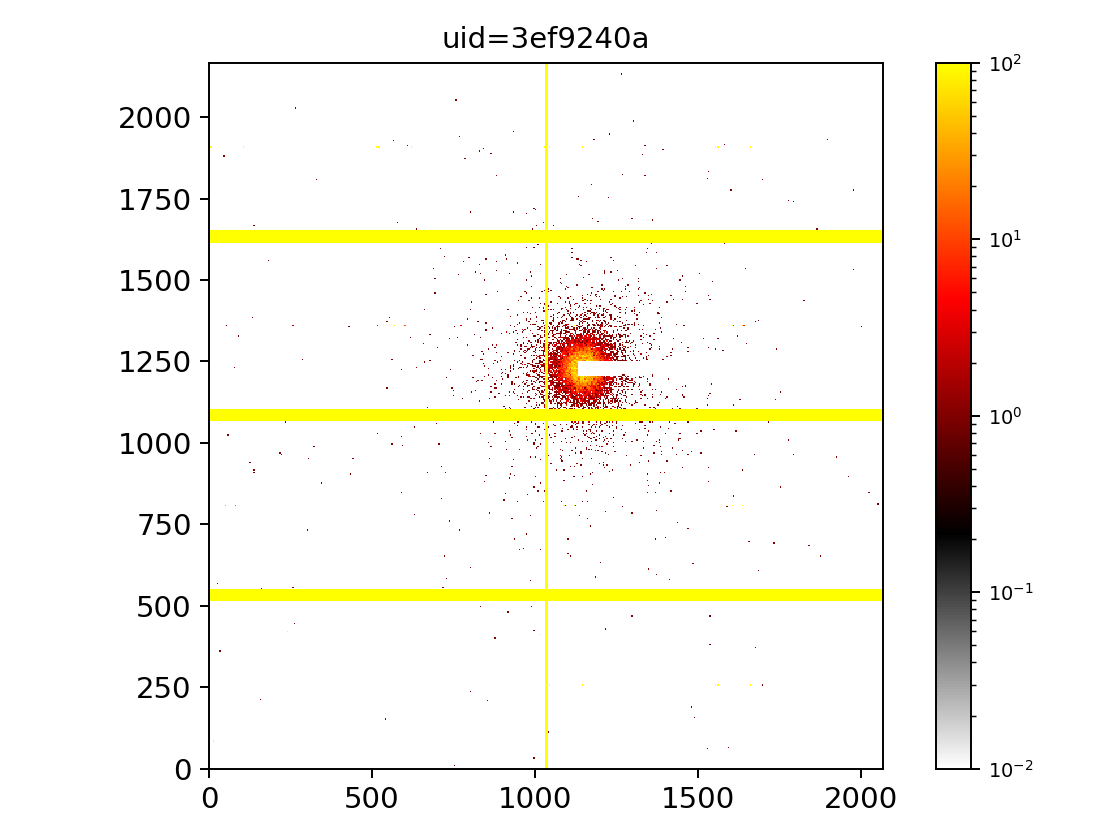

In [104]:
show_img( img,  vmin = .01, vmax = 100, logs= True, aspect=1, #save_format='tif',
         image_name= uidstr,  save=False, path=None, cmap=cmap_albula)#,center=center[::-1])